# Tutorial 5: RFE on the best 400 features

---

### Introduction

Hello, this notebook will show how to use RFE to perform further feature selection, as we found that most features are very highly correlated, therfore we would need to remove those using the tool that we mentioned above. 

first, let us call the data

In [1]:
%store -r df_input_GS
%store -r y_GS
%store -r df_GS

In [2]:
y_GS = y_GS.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GS, y_GS, test_size = 0.3, random_state=3, stratify=y_GS) # train and valid sets

In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(352, 2074)
(151, 2074)


---

<b><i> get the best N features </i></b> 

In [6]:
%store -r featImp_GS

In [7]:
arrimp = np.array(featImp_GS).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1793 1775 2048   31    3 1771  544 1781   17   45]


In [8]:
cols_ordered = df_input_GS.columns[sorted_idx][-400:]
cols_ordered

Index([1841.364,  980.575, 1133.147, 2337.819,  911.297, 1075.338, 1155.366,
        974.677, 1447.594, 1613.342,
       ...
       1968.596, 1942.053, 2441.281,   842.04,  834.451, 1936.251, 1010.382,
       1950.821,  838.229,  845.886],
      dtype='object', length=400)

---

In [9]:
Xtrain[cols_ordered]

,1841.364,980.575,1133.147,2337.819,911.297,1075.338,1155.366,974.677,1447.594,1613.342,...,1968.596,1942.053,2441.281,842.040,834.451,1936.251,1010.382,1950.821,838.229,845.886
210,-0.347752,-0.782148,-0.788094,-0.165300,-0.825079,-0.805515,-0.716025,-0.784317,-0.259222,-0.440796,...,-0.103180,-0.064431,-0.126623,-0.852611,-0.868323,-0.056824,-0.791167,-0.077484,-0.863861,-0.859112
266,0.597408,0.973945,0.975639,0.444570,1.038538,1.021833,0.902108,0.969298,0.414803,0.681119,...,0.323973,0.292242,0.386553,1.040755,1.046849,0.284218,0.986368,0.303714,1.044837,1.048485
458,0.954467,0.148099,0.146223,1.005679,-0.014365,0.042751,0.305590,0.144290,1.058035,0.908711,...,0.992127,0.954164,0.948222,-0.020894,-0.012900,0.947342,0.135750,0.966534,-0.014697,-0.009475
322,0.843525,1.076064,1.073435,0.764227,1.160048,1.132404,1.006338,1.075378,0.779457,0.892410,...,0.693932,0.669354,0.738082,1.176984,1.173067,0.661299,1.091540,0.674564,1.178287,1.173193
171,-1.332538,-1.178695,-1.178955,-1.317824,-1.103519,-1.118396,-1.244864,-1.178938,-1.322936,-1.319953,...,-1.295124,-1.280268,-1.305844,-1.101613,-1.111279,-1.276586,-1.157541,-1.285318,-1.109319,-1.106318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,-0.471415,-0.655091,-0.660125,-0.330135,-0.755149,-0.722527,-0.582161,-0.651424,-0.520635,-0.539580,...,-0.318073,-0.258179,-0.249466,-0.775807,-0.771421,-0.246058,-0.683964,-0.277660,-0.772976,-0.771858
430,1.887427,1.430805,1.428148,1.911442,1.390439,1.399330,1.493246,1.431303,2.074960,1.798811,...,1.950348,1.916986,1.834398,1.378890,1.385954,1.913913,1.412999,1.927220,1.381970,1.384165
5,-0.639943,-0.965198,-0.951341,-0.497273,-0.938288,-0.954291,-0.937417,-0.962535,-0.507058,-0.808180,...,-0.417211,-0.403042,-0.442860,-0.919328,-0.912298,-0.401600,-0.971304,-0.407482,-0.916736,-0.915225
310,1.131033,1.209887,1.212979,1.132749,1.248526,1.238886,1.187899,1.216206,1.094078,1.152663,...,1.100754,1.096170,1.103933,1.246935,1.246373,1.096653,1.219850,1.098692,1.251592,1.253352


### RFE

In [10]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [ ]:

def get_models():
    models = dict()
    for i in range(2, 51):
        rfe = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i, verbose = 0)
        model = LogisticRegression(solver = 'newton-cg')
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=50, random_state=1)
    # cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, Xtrain[cols_ordered[-400:]].values, Ytrain)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    


>2 0.682 (0.081)
>3 0.685 (0.082)
>4 0.690 (0.083)
>5 0.708 (0.085)
>6 0.773 (0.091)
>7 0.785 (0.080)
>8 0.791 (0.078)
>9 0.794 (0.078)
>10 0.792 (0.078)
>11 0.795 (0.077)
>12 0.793 (0.077)
>13 0.793 (0.078)
>14 0.797 (0.077)
>15 0.798 (0.077)
>16 0.801 (0.076)
>17 0.800 (0.076)
>18 0.801 (0.076)
>19 0.801 (0.076)
>20 0.801 (0.076)
>21 0.800 (0.076)
>22 0.799 (0.075)
>23 0.801 (0.075)
>24 0.801 (0.076)
>25 0.801 (0.076)
>26 0.804 (0.077)
>27 0.805 (0.076)
>28 0.808 (0.077)
>29 0.809 (0.077)
>30 0.810 (0.077)
>31 0.811 (0.077)
>32 0.812 (0.077)
>33 0.813 (0.076)
>34 0.813 (0.076)
>35 0.813 (0.076)
>36 0.815 (0.076)
>37 0.815 (0.076)
>38 0.815 (0.076)
>39 0.814 (0.076)
>40 0.815 (0.075)
>41 0.815 (0.076)
>42 0.814 (0.076)
>43 0.815 (0.077)
>44 0.814 (0.076)
>45 0.814 (0.076)
>46 0.814 (0.076)
>47 0.815 (0.077)


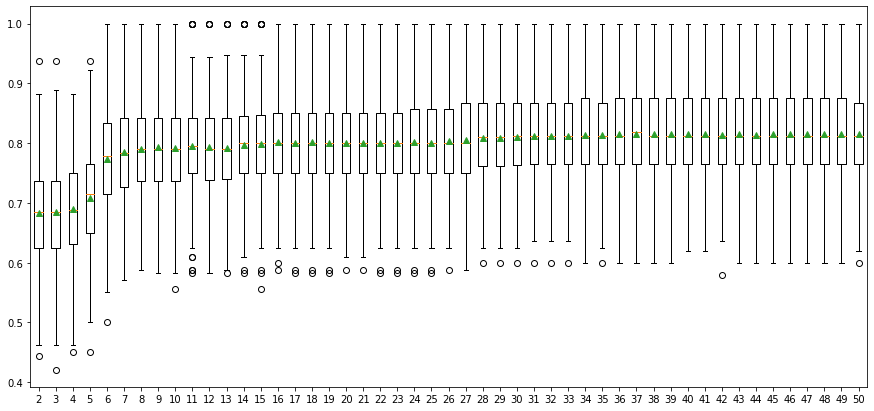

In [14]:
# plot model performance for comparison
plt.figure(figsize=(15, 7))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [12]:
print(1)

1
